# Perceptron Iris Project
    Collin Stratton
    CST-435
    Dr. James Gordon

    Data aquired from Halo annoucement
    Code obtained from https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php

## Aquire the Iris data
pandas will be used to fall data manipulation

In [2]:
import pandas as pd

df = pd.read_csv('Iris.csv')

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Extract the first 100 class labels corresponding to Iris-Setosa and Iris-Versicolor

In [4]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 5].values
y = np.where(y == 'Iris-setosa', -1, 1)

print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


### Extract the first 100 class labels corresponding to sepal length

In [5]:
x = df.iloc[0:100, [1, 3]].values

print(x)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

## Visualize the data on a Scatter Plot

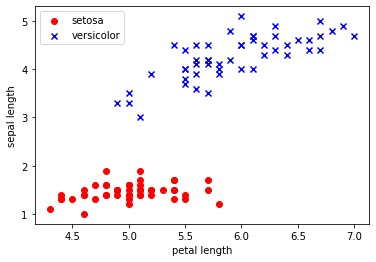

In [6]:
plt.scatter(x[:50, 0], x[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

## Train the Perceptron on the Iris data collected

### Graph the misclassification errors agains the number of epochs

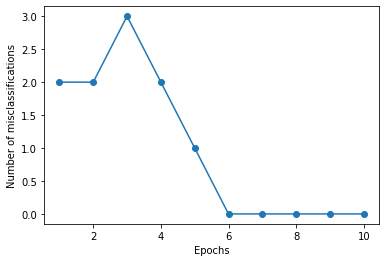

In [10]:
from perceptron import Perceptron

pn = Perceptron(0.1, 10)
pn.fit(x, y)

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

### Vistualize the decision boundaries

Create a function that will help with the creation of shading the coloring the decision boundaries

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

Plot the decision regions on the previous scatterplot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


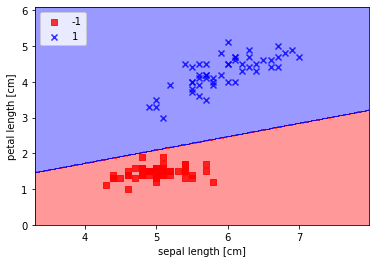

In [9]:
plot_decision_regions(x, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As seen in the graph aboce, the perceptron classified the two Iris flower classes perfectly. Perceptrons generall struggle with convergence, however, that doesn't seem to be the case here. 